In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def get_n_zeros(d):
    n_zeros = list()
    for i in range(d.shape[0]):
        n_zeros.append(sum(d[i,:] ==0))
    return np.array(n_zeros)

In [237]:
def check_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print('Directory created: %s' %(path))

In [2]:
d =pd.read_csv('../data/data_cmu_ctu.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
d

,ID,management,deceleration,variability,FHB,UA,UA_duration,UA_interval,datetime,seconds,...,m-590,m-591,m-592,m-593,m-594,m-595,m-596,m-597,m-598,m-599
0,CMU_288427_62400,0,0,0,140,0,0.0,NaN,2013-01-15 17:20,62400.0,...,23.000,23.000,24.000,0.000,24.000,24.000,24.000,25.000,25.000,25.000
1,CMU_288427_64440,1,2,0,140,1,60.0,120.0,2013-01-15 17:54,64440.0,...,0.000,23.000,23.000,23.000,24.000,0.000,25.000,24.000,25.000,26.000
2,CMU_288427_65700,1,2,0,155,0,0.0,NaN,2013-01-15 18:15,65700.0,...,17.000,17.000,17.000,0.000,17.000,17.000,17.000,17.000,0.000,16.000
3,CMU_288427_66540,1,2,0,150,0,0.0,NaN,2013-01-15 18:29,66540.0,...,28.000,29.000,29.000,30.000,30.000,31.000,30.000,29.000,28.000,27.000
4,CMU_288427_67140,1,2,0,155,1,120.0,60.0,2013-01-15 18:39,67140.0,...,63.000,0.000,61.000,60.000,62.000,59.000,0.000,62.000,56.000,57.000
5,CMU_288427_69540,0,0,0,160,1,90.0,90.0,2013-01-15 19:19,69540.0,...,71.000,77.000,80.000,78.000,0.000,70.000,69.000,70.000,0.000,71.000
6,CMU_288427_71820,1,0,1,155,1,60.0,60.0,2013-01-15 19:57,71820.0,...,52.000,47.000,44.000,43.000,40.000,39.000,38.000,36.000,34.000,34.000
7,CMU_288427_73140,0,0,0,155,1,90.0,60.0,2013-01-15 20:19,73140.0,...,68.000,0.000,67.000,67.000,65.000,64.000,62.000,62.000,61.000,59.000
8,CMU_288427_74940,0,0,0,155,1,90.0,60.0,2013-01-15 20:49,74940.0,...,35.000,35.000,35.000,35.000,35.000,34.000,0.000,34.000,34.000,34.000
9,CMU_288427_76140,0,0,0,160,1,90.0,60.0,2013-01-15 21:09,76140.0,...,35.000,35.000,34.000,35.000,34.000,35.000,35.000,38.000,0.000,38.000


In [34]:
d_ctu = d.loc[d['ID'].isin([cn for cn in d.ID if 'CTU_' in cn])]
d_cmu = d.loc[d['ID'].isin([cn for cn in d.ID if 'CMU_' in cn])]

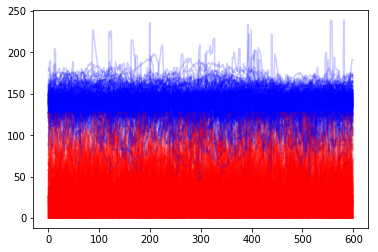

In [359]:
DT = d_cmu
B = np.array(DT[[k for k in DT.columns if 'b-' in k]])
M = np.array(DT[[k for k in DT.columns if 'm-' in k]])
assert B.shape[0]==M.shape[0], 'B, M not the same dimension'
B[B==0] = np.nan
B = np.array(pd.DataFrame(B).interpolate(limit_direction='both', axis=1))
M = np.array(pd.DataFrame(M).interpolate(limit_direction='both', axis=1))
for i in range(len(B)):
    plt.plot(B[i], color = 'blue', alpha = 0.2)
    plt.plot(M[i], color = 'red', alpha = 0.2)

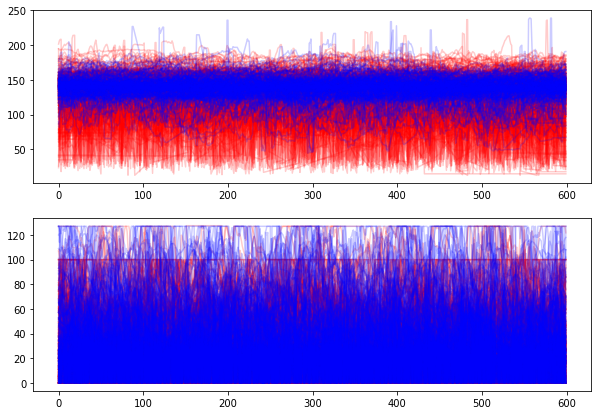

In [364]:
fig = plt.figure(figsize=(10,7))
plt.subplot('21%s' % (1))

DT = d_ctu
B = np.array(DT[[k for k in DT.columns if 'b-' in k]])
M = np.array(DT[[k for k in DT.columns if 'm-' in k]])
assert B.shape[0]==M.shape[0], 'B, M not the same dimension'
B[B==0] = np.nan
B = np.array(pd.DataFrame(B).interpolate(limit_direction='both', axis=1))
M = np.array(pd.DataFrame(M).interpolate(limit_direction='both', axis=1))
for i in range(len(B)):
    plt.plot(B[i], color = 'red', alpha = 0.2)
#     plt.plot(M[i], color = 'red', alpha = 0.2)

DT = d_cmu
B = np.array(DT[[k for k in DT.columns if 'b-' in k]])
M = np.array(DT[[k for k in DT.columns if 'm-' in k]])
assert B.shape[0]==M.shape[0], 'B, M not the same dimension'
B[B==0] = np.nan
B = np.array(pd.DataFrame(B).interpolate(limit_direction='both', axis=1))
M = np.array(pd.DataFrame(M).interpolate(limit_direction='both', axis=1))
for i in range(len(B)):
    plt.plot(B[i], color = 'blue', alpha = 0.2)
#     plt.plot(M[i], color = 'red', alpha = 0.2)





plt.subplot('21%s' % (2))
DT = d_ctu
B = np.array(DT[[k for k in DT.columns if 'b-' in k]])
M = np.array(DT[[k for k in DT.columns if 'm-' in k]])
assert B.shape[0]==M.shape[0], 'B, M not the same dimension'
B[B==0] = np.nan
B = np.array(pd.DataFrame(B).interpolate(limit_direction='both', axis=1))
M = np.array(pd.DataFrame(M).interpolate(limit_direction='both', axis=1))
for i in range(len(B)):
#     plt.plot(B[i], color = 'red', alpha = 0.2)
    plt.plot(M[i], color = 'red', alpha = 0.2)

DT = d_cmu
B = np.array(DT[[k for k in DT.columns if 'b-' in k]])
M = np.array(DT[[k for k in DT.columns if 'm-' in k]])
assert B.shape[0]==M.shape[0], 'B, M not the same dimension'
B[B==0] = np.nan
B = np.array(pd.DataFrame(B).interpolate(limit_direction='both', axis=1))
M = np.array(pd.DataFrame(M).interpolate(limit_direction='both', axis=1))
for i in range(len(B)):
#     plt.plot(B[i], color = 'blue', alpha = 0.2)
    plt.plot(M[i], color = 'blue', alpha = 0.2)

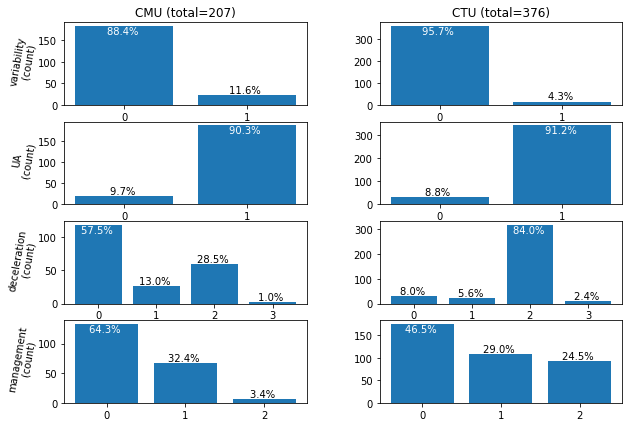

Directory created: ./eda_plot


In [239]:
i  = 0
fig = plt.figure(figsize=(10,7))
for tg in ['variability', 'UA','deceleration', 'management']:
    i +=2
    fig.subplots_adjust(hspace=0.2, wspace=0.3)
    plt.subplot('42%s' % (i-1))
    
    d_tmp = d_cmu.groupby(tg)[tg].count()#.sort_values(ascending=False)
    bar = plt.bar(d_tmp.index, d_tmp.values)
    plt.xticks(d_tmp.index, d_tmp.index.astype(int).map(str))
    plt.ylabel(tg+'\n (count)', rotation=80)
#     plt.xlabel(tg)
    plt.xticks(rotation=0)
    
    mx = d_tmp.values.max()
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%s ' % (str(round((height/len(d_cmu)*100),1))+'%'),
                 ha='center',
                 va='top' if height==mx else 'bottom',
                 color = 'white' if height ==mx else 'black')
    if i ==2:
        plt.title('CMU (total=%d)' % (len(d_cmu)))
    

    
    plt.subplot('42%s' % (i))
    
    d_tmp = d_ctu.groupby(tg)[tg].count()#.sort_values(ascending=False)
    bar = plt.bar(d_tmp.index, d_tmp.values)
    plt.xticks(d_tmp.index, d_tmp.index.astype(int).map(str))
#     plt.xlabel(tg)
    plt.xticks(rotation=0)
    
    mx = d_tmp.values.max()
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%s ' % (str(round((height/len(d_ctu)*100),1))+'%'),
                 ha='center',
                 va='top' if height==mx else 'bottom',
                 color = 'white' if height ==mx else 'black')
    if i ==2:
        plt.title('CTU (total=%d)' % (len(d_ctu)))
        
plt.show()
# check_dir('./eda_plot')
# fig.savefig('./eda_plot/target_dist.png', dpi=100, format='png',bbox_inches='tight' )

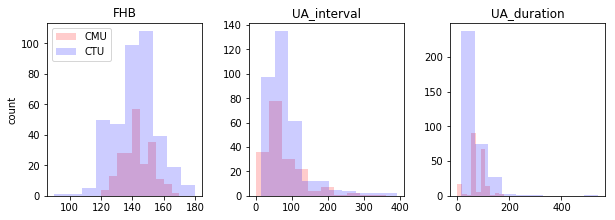

In [317]:
i  = 0
fig = plt.figure(figsize=(10,7))
for tg in ['FHB', 'UA_interval', 'UA_duration']:
    i +=1
    fig.subplots_adjust(hspace=0.2, wspace=0.3)
    plt.subplot('23%s' % (0+i))
    
    d_tmp = d_cmu[tg].dropna()
    hist1 = plt.hist(d_tmp, color = 'red', alpha = 0.2, label='CMU')

    d_tmp = d_ctu[tg].dropna()
    hist2 = plt.hist(d_tmp, color = 'b', alpha = 0.2, label='CTU')
    
    
    

    if i ==1:
        plt.title(tg)
        plt.ylabel('count')
        plt.legend()
    elif i ==2:
        plt.title(tg)
    elif i ==3:
        plt.title(tg)

        
plt.show()
# check_dir('./eda_plot')
# fig.savefig('./eda_plot/target_cont_dist.png', dpi=100, format='png',bbox_inches='tight' )